# CarPrice_Assignment

In [ ]:
#1. Loading and Preprocessing 

In [ ]:
#1. Loading and Preprocessing 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('CarPrice_Assignment.csv') 



In [25]:
# Display basic info
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int32  
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

None

In [9]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [27]:
display(df.head())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
#Checking for Missing Values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [47]:
#Dropping Duplicates
df.drop_duplicates(inplace=True)


In [35]:
# Encoding categorical variables
categorical_columns = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                        'enginetype', 'cylindernumber', 'fuelsystem']
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [37]:
#Defining Features and Target Variable
X = df.drop(columns=['price', 'car_ID'])  # Drop ID column as it's not useful
y = df['price']


In [39]:
#Scaling the Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [41]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [43]:
print("Preprocessing complete. Data is ready for modeling.")


Preprocessing complete. Data is ready for modeling.


# 2.Model Implementation :Implement the following five regression algorithms


In [51]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
# 1) Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)


In [55]:
# 2) Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)

In [57]:
# 3) Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

In [59]:
# 4) Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)


In [61]:
# 5) Support Vector Regressor (SVR)
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)
y_pred_svr = svr_regressor.predict(X_test)

In [63]:
# Evaluate Models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

In [65]:
# Evaluating models
mse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
mse_gb, r2_gb = evaluate_model(y_test, y_pred_gb)
mse_svr, r2_svr = evaluate_model(y_test, y_pred_svr)

In [67]:
# Displaying the results
print(f"Linear Regression - MSE: {mse_linear:.2f}, R2: {r2_linear:.2f}")
print(f"Decision Tree Regressor - MSE: {mse_dt:.2f}, R2: {r2_dt:.2f}")
print(f"Random Forest Regressor - MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")
print(f"Gradient Boosting Regressor - MSE: {mse_gb:.2f}, R2: {r2_gb:.2f}")
print(f"Support Vector Regressor - MSE: {mse_svr:.2f}, R2: {r2_svr:.2f}")

Linear Regression - MSE: 12575220.83, R2: 0.84
Decision Tree Regressor - MSE: 9748175.80, R2: 0.88
Random Forest Regressor - MSE: 3505673.95, R2: 0.96
Gradient Boosting Regressor - MSE: 6229270.97, R2: 0.92
Support Vector Regressor - MSE: 86843974.54, R2: -0.10


# 3.Evaluate Models with Additional Metric (MAE)

In [69]:
from sklearn.metrics import mean_absolute_error

# Evaluate Models with additional metric MAE
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, r2, mae


In [71]:

# Evaluating models
mse_linear, r2_linear, mae_linear = evaluate_model(y_test, y_pred_linear)
mse_dt, r2_dt, mae_dt = evaluate_model(y_test, y_pred_dt)
mse_rf, r2_rf, mae_rf = evaluate_model(y_test, y_pred_rf)
mse_gb, r2_gb, mae_gb = evaluate_model(y_test, y_pred_gb)
mse_svr, r2_svr, mae_svr = evaluate_model(y_test, y_pred_svr)



In [73]:
# Displaying the results
print(f"Linear Regression - MSE: {mse_linear:.2f}, R2: {r2_linear:.2f}, MAE: {mae_linear:.2f}")
print(f"Decision Tree Regressor - MSE: {mse_dt:.2f}, R2: {r2_dt:.2f}, MAE: {mae_dt:.2f}")
print(f"Random Forest Regressor - MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}, MAE: {mae_rf:.2f}")
print(f"Gradient Boosting Regressor - MSE: {mse_gb:.2f}, R2: {r2_gb:.2f}, MAE: {mae_gb:.2f}")
print(f"Support Vector Regressor - MSE: {mse_svr:.2f}, R2: {r2_svr:.2f}, MAE: {mae_svr:.2f}")


Linear Regression - MSE: 12575220.83, R2: 0.84, MAE: 2136.78
Decision Tree Regressor - MSE: 9748175.80, R2: 0.88, MAE: 2078.87
Random Forest Regressor - MSE: 3505673.95, R2: 0.96, MAE: 1305.02
Gradient Boosting Regressor - MSE: 6229270.97, R2: 0.92, MAE: 1738.35
Support Vector Regressor - MSE: 86843974.54, R2: -0.10, MAE: 5696.20


In [ ]:
# Comparison of Models Based on R², MSE, and MAE

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Load the dataset
df = pd.read_csv('CarPrice_Assignment.csv')  # Ensure the file path is correct


In [46]:
# Display basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [48]:
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [50]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [52]:

# Encoding categorical variables
categorical_columns = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
                       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [54]:
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])


In [56]:
# Define features (X) and target variable (y)
X = df.drop(columns=['price', 'car_ID'])  # Drop ID as it's not useful
y = df['price']

In [58]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# Evaluating models
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [64]:
# Define models
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor(random_state=42)),
    ("Random Forest Regressor", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(random_state=42)),
    ("Support Vector Regressor", SVR(kernel='rbf'))
]

In [66]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, r2, mae

In [68]:
# Store evaluation results
results = []


In [70]:
# Loop through models and evaluate
for name, model in models:
    mse, r2, mae = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append((name, mse, r2, mae))

In [72]:
# Display results in a readable format
print(f"{'Model':<30}{'MSE':<15}{'R²':<10}{'MAE':<10}")
print("-" * 65)
for result in results:
    print(f"{result[0]:<30}{result[1]:<15.2f}{result[2]:<10.2f}{result[3]:<10.2f}")

Model                         MSE            R²        MAE       
-----------------------------------------------------------------
Linear Regression             12575220.83    0.84      2136.78   
Decision Tree Regressor       9748175.80     0.88      2078.87   
Random Forest Regressor       3505673.95     0.96      1305.02   
Gradient Boosting Regressor   6229270.97     0.92      1738.35   
Support Vector Regressor      86843974.54    -0.10     5696.20   


# 4.Feature Importance Analysis

C:\Users\Cyntexia\AppData\Local\Temp\ipykernel_8476\2339091165.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')


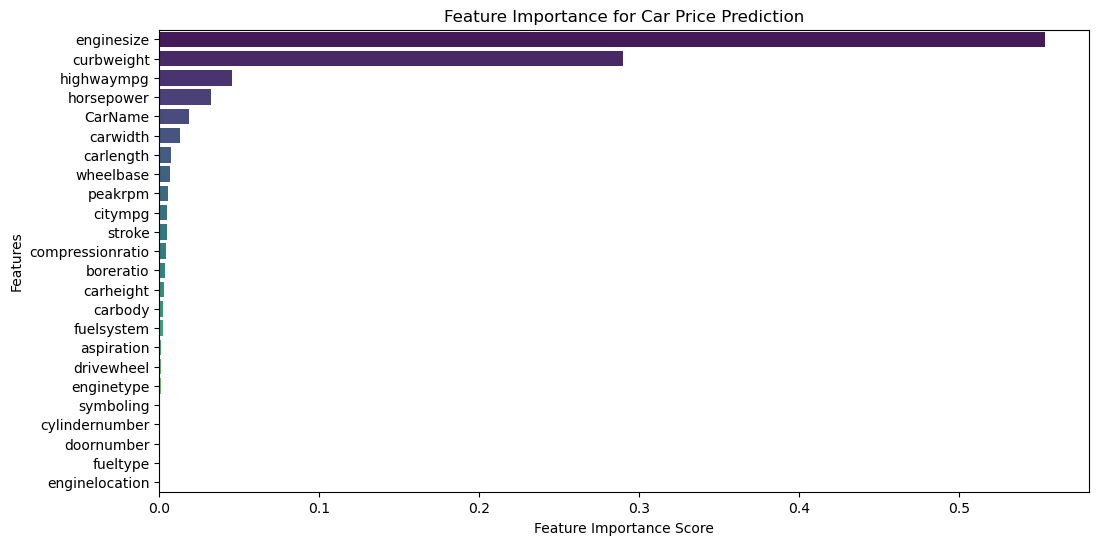

Top Important Features Affecting Car Prices:
       Feature  Importance
15  enginesize    0.554026
12  curbweight    0.289695
23  highwaympg    0.045507
20  horsepower    0.032247
1      CarName    0.018794
10    carwidth    0.012669
9    carlength    0.006999
8    wheelbase    0.006762
21     peakrpm    0.005359
22     citympg    0.004550


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv('CarPrice_Assignment.csv')  

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Encoding categorical variables
categorical_columns = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
                        'enginetype', 'cylindernumber', 'fuelsystem']
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define features and target variable
X = df.drop(columns=['price', 'car_ID'])  # Drop ID column as it's not useful
y = df['price']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model again to extract feature importances
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)  # Now X_train is properly defined

# Extract feature importance scores
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Car Price Prediction")
plt.show()

# Display top important features
print("Top Important Features Affecting Car Prices:")
print(importance_df.head(10))


# 5. Hyperparameter Tuning

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, 
                              scoring='r2', cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# Best Parameters for Random Forest
best_rf = rf_grid_search.best_estimator_
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)

# Evaluate Performance of the Tuned Model
y_pred_rf = best_rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print(f"\nTuned Random Forest Performance:")
print(f"R² Score: {rf_r2:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"MAE: {rf_mae:.4f}")

# Define hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Perform Grid Search for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, 
                              scoring='r2', cv=5, n_jobs=-1, verbose=1)
gb_grid_search.fit(X_train, y_train)

# Best Parameters for Gradient Boosting
best_gb = gb_grid_search.best_estimator_
print("\nBest Parameters for Gradient Boosting:", gb_grid_search.best_params_)

# Evaluate Performance of the Tuned Model
y_pred_gb = best_gb.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)

print(f"\nTuned Gradient Boosting Performance:")
print(f"R² Score: {gb_r2:.4f}")
print(f"MSE: {gb_mse:.4f}")
print(f"MAE: {gb_mae:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Tuned Random Forest Performance:
R² Score: 0.9570
MSE: 3392783.5841
MAE: 1270.6763
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Tuned Gradient Boosting Performance:
R² Score: 0.9389
MSE: 4820151.9778
MAE: 1603.3458
